### Assignment: Enhancing Predictive Model for House Prices
To better understand the factors influencing house prices, let's incorporate additional relevant features using the dataset Housing_more.csv.

### 1. Load Data Set

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load data set
house_set = pd.read_excel('Housing_more.xlsx')

### 2. Explore the Data:
* Determine the number of columns and rows.
* Check the data types, missing values, and other relevant statistics.

In [4]:
#Explore what data entails
house_set.head(10)

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
#determine number of rows and columns
house_set.shape

(545, 13)

This data set has 545 rows and 13 columns

In [8]:
#List of columns
house_set.columns

Index(['price', 'size', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
#Check the datatypes
house_set.dtypes

price                int64
size                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
#check for statistical analysis of numerical data
house_set.describe()

,price,size,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
#Check for missing values
house_set.isnull().sum()

price               0
size                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 3. Data Preprocessing:
* Clean and preprocess the data, handling any missing values.
> Data has no missing values
* Encode categorical variables if necessary.

In [15]:
#Encode for categorical variables using label encoder

#Import label encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#List of columns to encode
encode_columns = ['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning', 'prefarea', 'furnishingstatus']

#Encode categorical variables
for column in encode_columns:
  house_set.loc[:, column] = label.fit_transform(house_set[column])


In [17]:
house_set.head(10)

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


### 4. Feature Selection:
* Choose the most relevant features that contribute to predicting the target variable (house prices).
* For example, after encoding categorical variables, consider selecting the following features:
 * size, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, and parking.

In [18]:
#Columns to be used
featured_columns = ['size', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking']

#Split data
x = house_set[featured_columns]
y = house_set['price']

In [19]:
#Check data
x

,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,7420,4,2,3,1,0,0,0,1,2
1,8960,4,4,4,1,0,0,0,1,3
2,9960,3,2,2,1,0,1,0,0,2
3,7500,4,2,2,1,0,1,0,1,3
4,7420,4,1,2,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2
541,2400,3,1,1,0,0,0,0,0,0
542,3620,2,1,1,1,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0


In [21]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### 5. Model Training:
* Train your regression model using the selected features and the target variable (prices).

In [22]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression

#Create model
model = LinearRegression()

#Train model
model.fit(x, y)

LinearRegression()

### 6. Model Evaluation:
* Utilize appropriate evaluation metrics to assess the model's performance.
* Common evaluation metrics for regression models include:
 * R-squared (R²) score

In [28]:
# Predict the price for the original data points
y_pred = model.predict(x)
y_pred[:5]

array([ 7598367.46196022, 10764332.53061111,  7280040.57743999,
        7946753.94111191,  6986436.65742161])

In [29]:
#Calculate R-squared score

#import metrics
from sklearn.metrics import r2_score

#Check the R-squared
r2_score(y, y_pred)

1.0

In [31]:
#Mean Squared Error

#Import metrics
from sklearn.metrics import mean_squared_error

#Calculate mse
mse = mean_squared_error(y, y_pred)

print(mse)

0.0


### 7. Additional Step

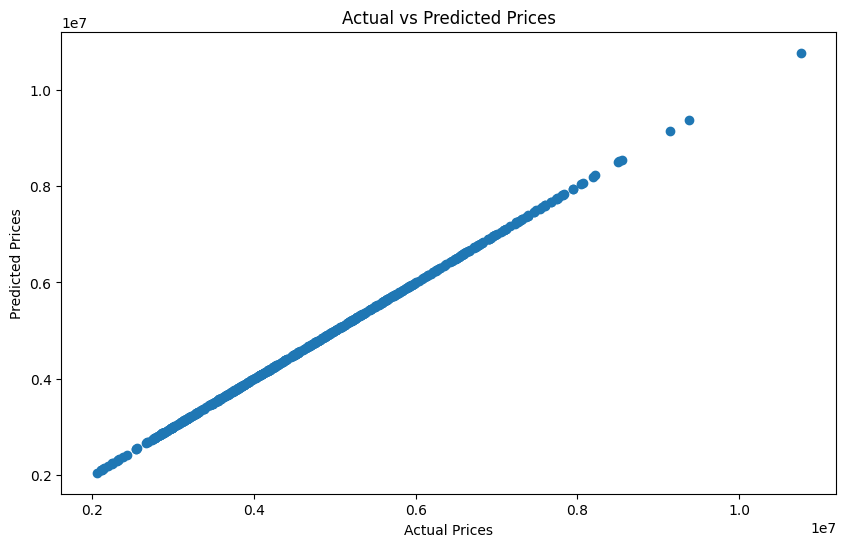

In [33]:
# Plotting the actual vs predicted values

#state figure size
plt.figure(figsize=(10, 6))

#Scatter plot
plt.scatter(y, y_pred)

#Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

#show plot
plt.show()